Importing Libraries

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

Loading the Data

In [65]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Checking the Data

In [66]:
print(f'Shape of the Dataset : {df.shape}')
print('\n')
print('Dataset Information')
print(df.info())
print('\n')
print('Empty Datapoints')
print(df.isnull().sum())

Shape of the Dataset : (1338, 7)


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


Empty Datapoints
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Plotting the Input Values

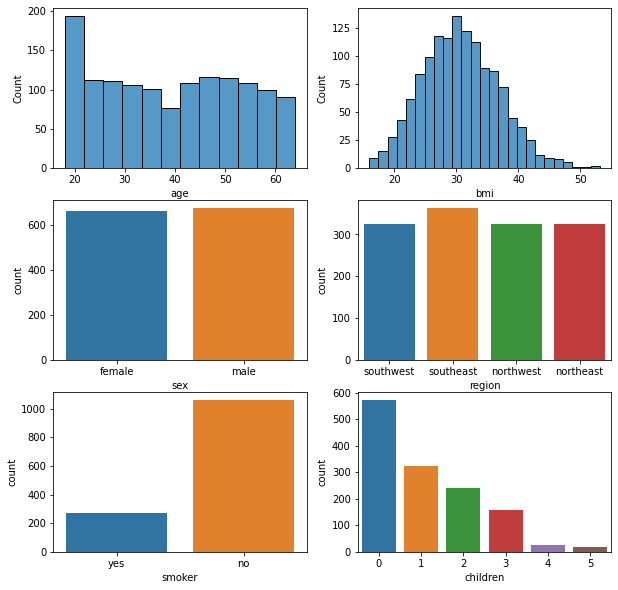

In [67]:
fig, axs = plt.subplots(3,2, figsize=(10,10))
sns.histplot(df['age'], ax=axs[0,0])
sns.histplot(df['bmi'], ax=axs[0,1])
sns.countplot(x='sex', data = df, ax=axs[1,0])
sns.countplot(x='region', data = df, ax=axs[1,1])
sns.countplot(x='smoker', data = df, ax=axs[2,0])
sns.countplot(x='children', data = df, ax=axs[2,1])
plt.show()


Plotting the Output Value

<AxesSubplot:xlabel='charges', ylabel='Count'>

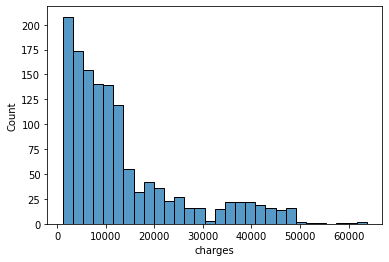

In [68]:
sns.histplot(df['charges'])

Encoding the Data

In [69]:
df.replace({'sex':{'male':0, 'female':1}}, inplace = True)
df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)

In [70]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Understanding the Correlation

<AxesSubplot:>

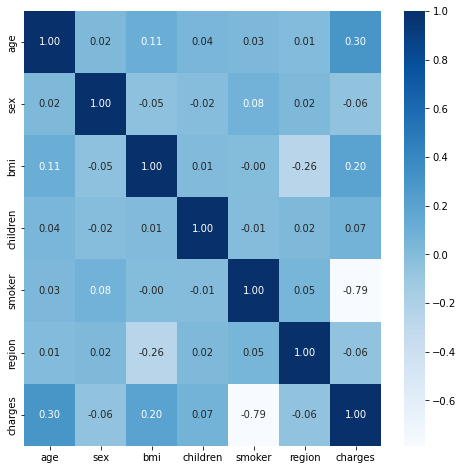

In [71]:
cor = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cor, cmap = 'Blues', cbar = True, annot = True, fmt='0.2f')

Features and Target

In [72]:
x = df.drop(['charges'], axis=1)
y = df['charges']

Splitting Data into Training and Testing Data

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 3)

Training the Model

In [74]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

Model Prediction on Training Data

In [75]:
y_predTrain = model.predict(x_train)

Comparing Actual Data vs Predicted Data

In [76]:
dfr = pd.DataFrame({'Actual Price':y_train,'Predicted Price':y_predTrain})
print(dfr)

      Actual Price  Predicted Price
782     9386.16130      9518.770709
502    22218.11490     22911.405373
147     9877.60770      9803.448213
921    13462.52000     13619.991115
164     5028.14660      9803.326413
...            ...              ...
789    13457.96080     13870.037934
256    43921.18370     45234.657134
968     3279.86855      4357.681763
952     4527.18295      4670.926982
1273    4747.05290      5368.366966

[1070 rows x 2 columns]


Error in Training Data Prediction

In [77]:
score1 = metrics.r2_score(y_predTrain, y_train)
print(f"R2 error in Training Data: {score1}")

R2 error in Training Data: 0.9741825701982832


Model Prediction on Testing Data

In [78]:
y_predTest = model.predict(x_test)

Comparing Actual Data vs Predicted Data

In [79]:
dfrt = pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_predTest})
print(dfrt)

      Actual Price  Predicted Price
353    12404.87910      4318.909775
339     8232.63880     10562.326309
65      1743.21400      2025.219834
685    11244.37690     16458.579163
781     1146.79660      1642.596738
...            ...              ...
1274   17043.34140     17527.552874
173     5246.04700      5219.986400
552    12957.11800     14414.185838
1145   11289.10925     15346.806802
46      3393.35635      6768.936263

[268 rows x 2 columns]


Error in Testing Data Prediction

In [80]:
score2 = metrics.r2_score(y_predTest, y_test)
print(f"R2 Error in Testing Data: {score2}")

R2 Error in Testing Data: 0.8386212396187201


Model Score

In [81]:
model.score(x_test,y_test)

0.8513996769511017